Matplotlib is building the font cache; this may take a moment.


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
target
0    50
1    50
2    50
Name: count, dtype: int64


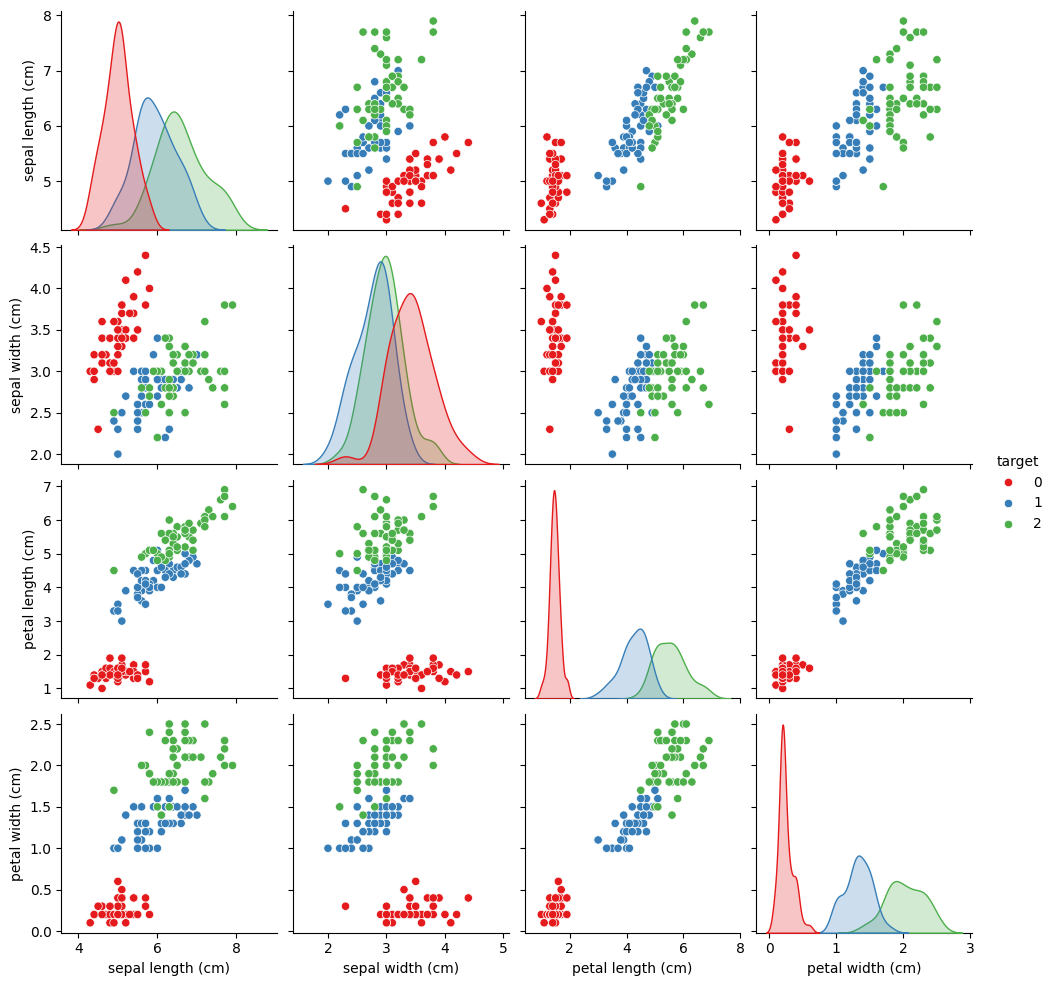

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


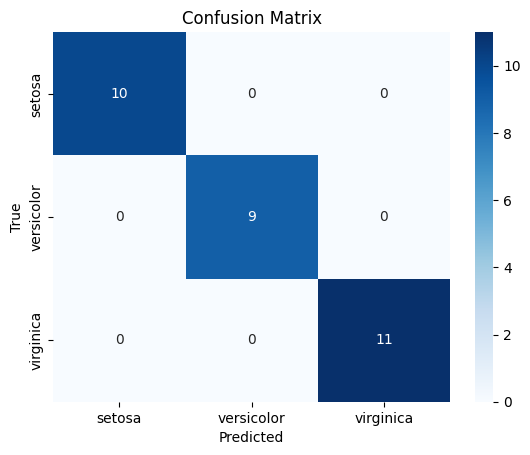

Model saved as iris_logreg_model.joblib


In [ ]:
# Iris Classification - Machine Learning Walkthrough

# This notebook demonstrates how to load the Iris dataset, explore it, train a simple classifier, and evaluate its performance.

## 1. Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## 2. Load the Iris Dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
class_names = iris.target_names

# Convert to DataFrame for easier exploration
iris_df = pd.DataFrame(X, columns=feature_names)
iris_df['target'] = y

## 3. Explore the Data
print(iris_df.head())
print(iris_df['target'].value_counts())

# Visualize pairplot
import seaborn as sns
sns.pairplot(iris_df, hue='target', palette='Set1')
plt.show()

## 4. Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 5. Train a Simple Model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

## 6. Evaluate the Model
predictions = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, predictions))
print('Classification Report:\n', classification_report(y_test, predictions, target_names=class_names))
print('Confusion Matrix:\n', confusion_matrix(y_test, predictions))

# Visualize confusion matrix
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## 7. (Optional) Save the Model
import joblib
joblib.dump(model, 'iris_logreg_model.joblib')
print('Model saved as iris_logreg_model.joblib')